In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# Load the data
df = pd.read_csv("matched_sensor_data.csv")
df = df[["temperature", "humidity", "soundLevel", "event"]]

# Manual mapping: fire → 1, normal → 0
df["event_encoded"] = df["event"].map({"normal": 0, "fire": 1})

# Features and target
X = df[["temperature", "humidity", "soundLevel"]]
y = df["event_encoded"]

# Train/test split (stratify to keep class ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [4]:
# Initialize the classifier
classifier = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42
)

# Train the model
classifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
# Predict on test set
y_pred = classifier.predict(X_test)

In [6]:
# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["normal", "fire"]))

Classification Report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00       792
        fire       1.00      1.00      1.00       135

    accuracy                           1.00       927
   macro avg       1.00      1.00      1.00       927
weighted avg       1.00      1.00      1.00       927



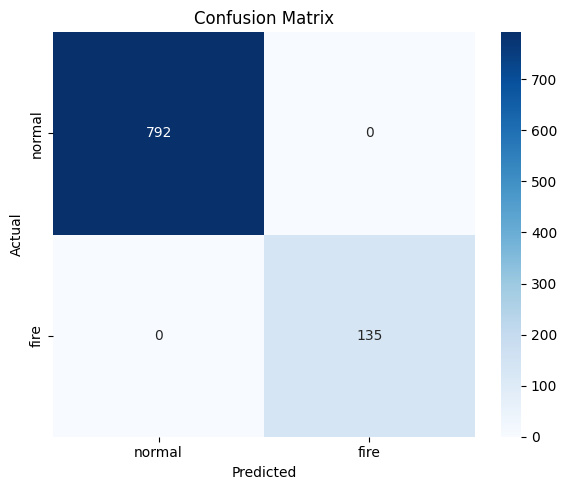

In [7]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Manually define labels since no LabelEncoder was used
labels = ["normal", "fire"]

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

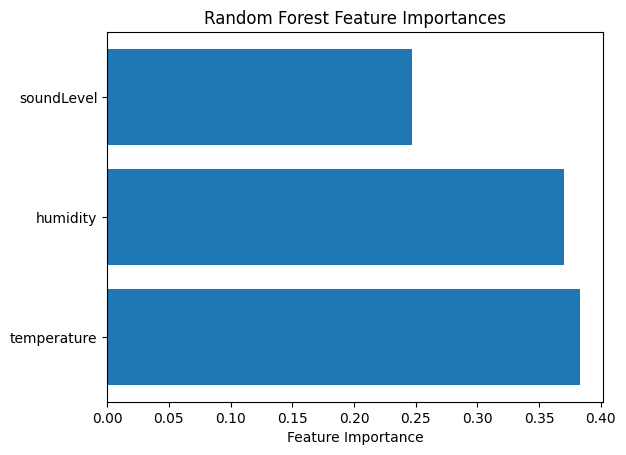

In [8]:
importances = classifier.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()